#### *ML Project - Bank Marketing Prediction*

###### *Tasks to perform*

>Read in the file and get basic information about the data, including numerical summaries.

> Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

> Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

> Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

> Make a box plot for pdays. Do you see any outliers?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
bank_mark=pd.read_csv('/content/drive/MyDrive/bank marketing prediction/bank-marketing.csv')

>.


#### Initial Details about the dataset to get the basic insights

In [ ]:
bank_mark.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_mark.shape

(45211, 19)

In [ ]:
bank_mark.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Describe the pdays column

, make note of the mean, median and minimum values. Anything fishy in the values?

In [ ]:
bank_mark['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

> "pdays" is using -1 as indicator and not value. 
Hence treat these are missing value.

>Ignore these values in our average/median/state calculations.Keeping it NaN makes more sense so Wherever pdays is -1, replacing the same with NaN.

In [ ]:
df = bank_mark.copy()

In [ ]:
df.drop(bank_mark[bank_mark['pdays']<0].index, inplace=True)

In [ ]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

##### *Ploting a bar graph with the median values of balance for each education level value. Which group has the highest median?*
Removing objects and numerical data types to represent the graph accurately.

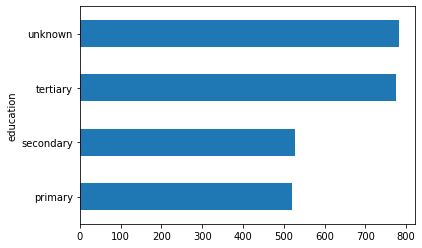

In [ ]:
df.groupby(['education'])['balance'].median().plot.barh()

### *Tertiary level of education having median value for balance as the plot implies*

>

>Make a box plot for pdays. Do you see any outliers?

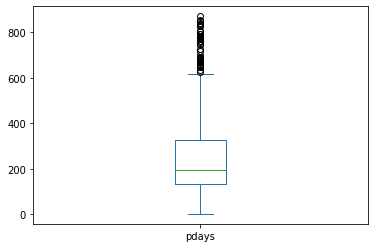

In [ ]:
df.pdays.plot.box()
plt.show()

> Clear Indication in the boxplot which confirms the presence of outliers( data point that differs significantly from other observations.).

>
#### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

###### First, perform bi-variate analysis to identify the features that are directly associated with the target variable.

- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical features and categorical features’
###### Are the features about the previous campaign data useful?
###### Are pdays and poutcome associated with the target?
###### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

In [ ]:
df['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [ ]:
df.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [ ]:
df.replace({'response': {"yes":1, "no":0}}, inplace=True)

In [ ]:
df['response'].value_counts()

0    6352
1    1905
Name: response, dtype: int64

>

*Taking away objects and numerical datatypes*

In [ ]:
obj_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [ ]:
print("Features of Object ",obj_col)
print(" Features of Numerical ",num_col)

Features of Object  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 Features of Numerical  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


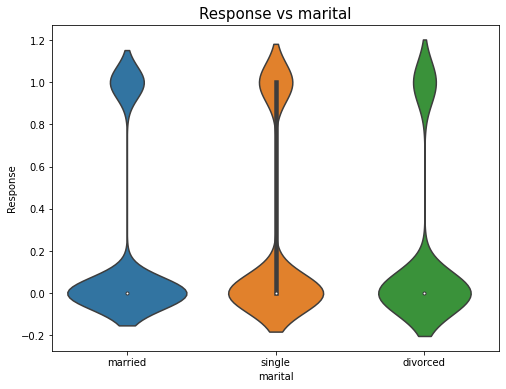

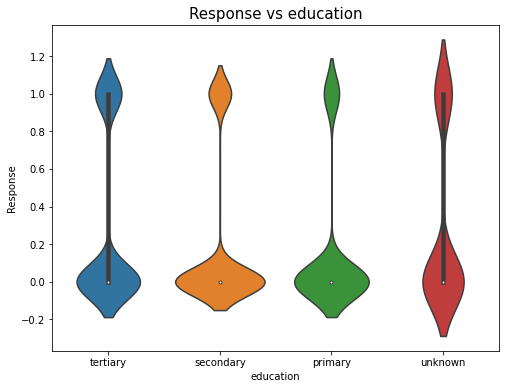

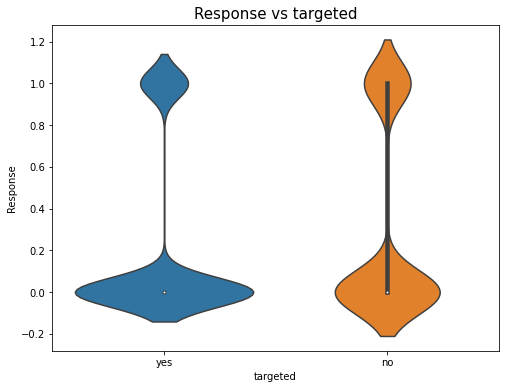

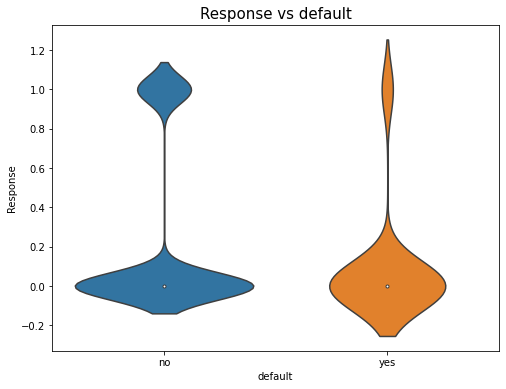

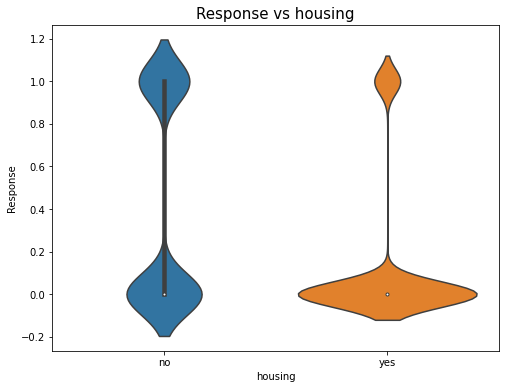

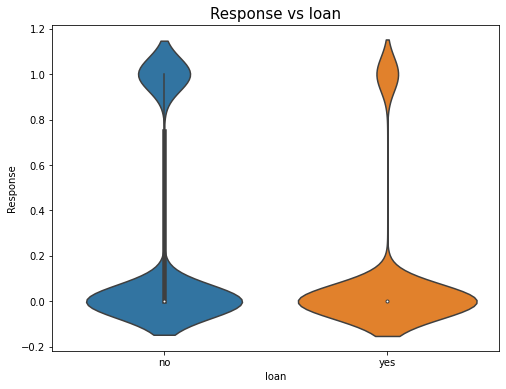

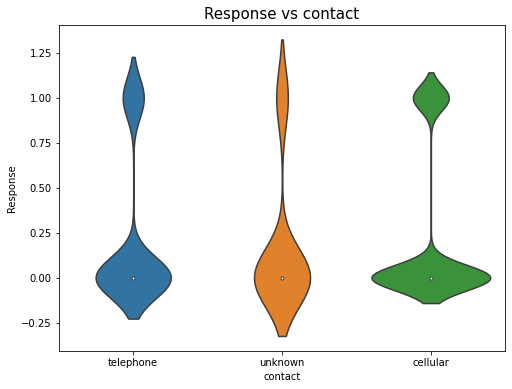

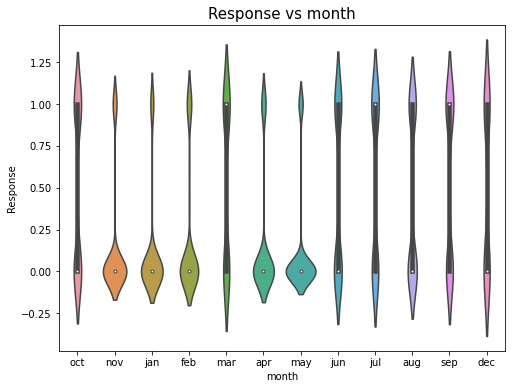

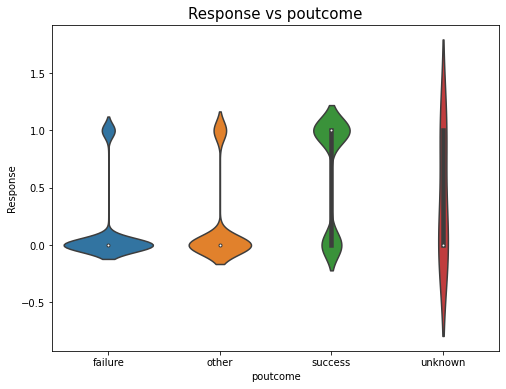

In [ ]:
## violin plots is used as it gives proper distribution of data shows the data is Neg/Postive skewed or not at all.


from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

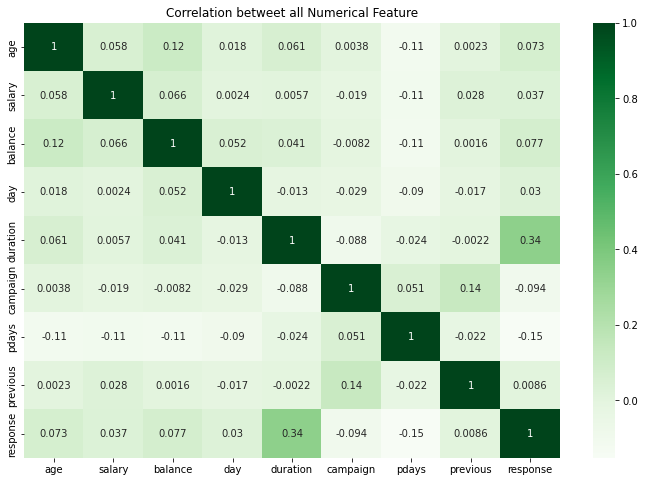

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.title("Correlation betweet all Numerical Feature")
plt.show()

> To summarize "duration" variable is correlated with response variable.
 Whereas "pdays" variable is not highly correlated with response variable. 

<Figure size 720x576 with 0 Axes>

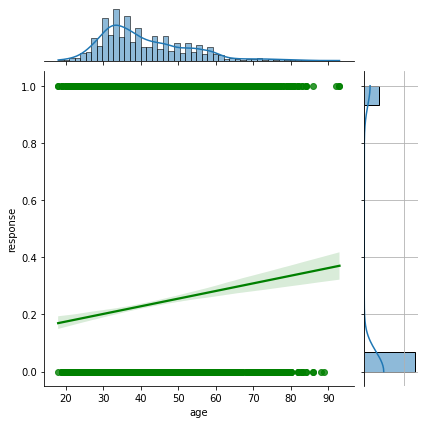

<Figure size 720x576 with 0 Axes>

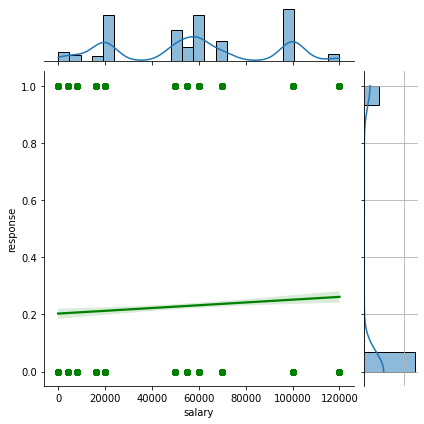

<Figure size 720x576 with 0 Axes>

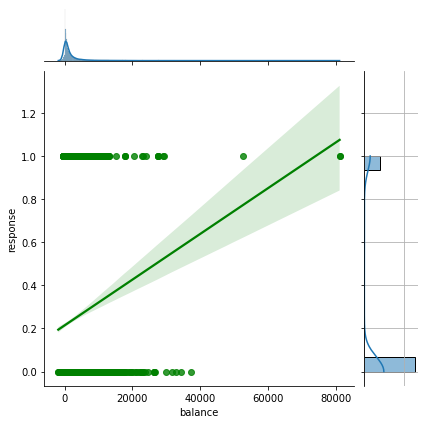

<Figure size 720x576 with 0 Axes>

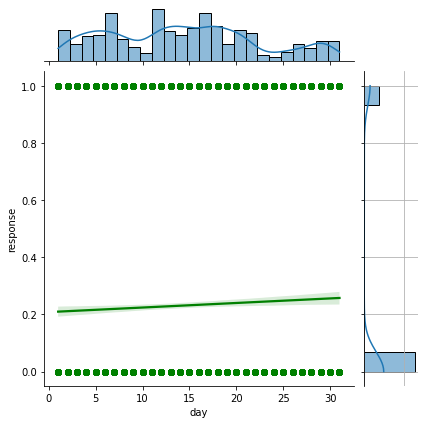

<Figure size 720x576 with 0 Axes>

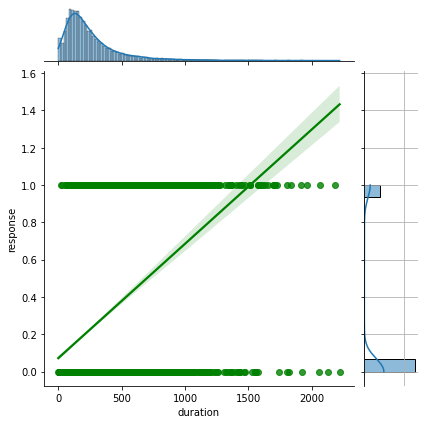

<Figure size 720x576 with 0 Axes>

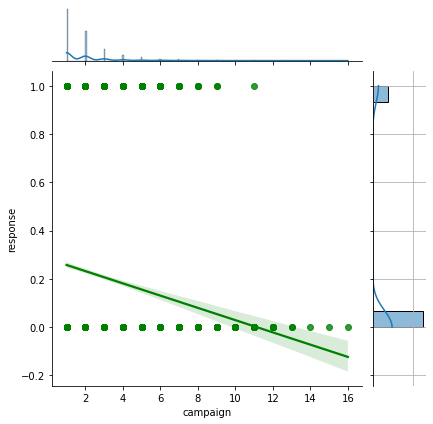

<Figure size 720x576 with 0 Axes>

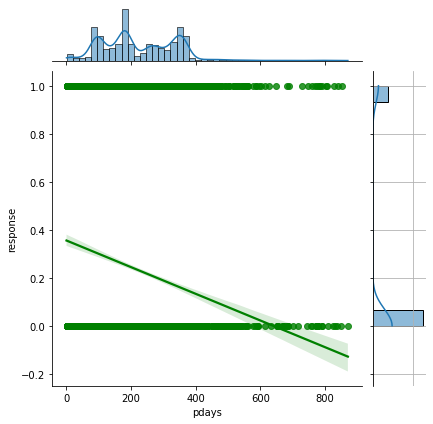

<Figure size 720x576 with 0 Axes>

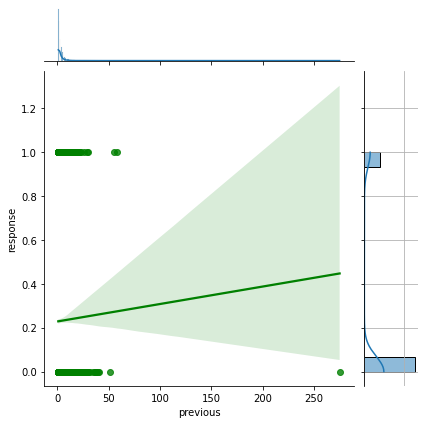

In [ ]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["response"],kind='reg',joint_kws={'color':'green'})
    plt.xlabel(col,fontsize = 12)
    plt.ylabel("Response",fontsize = 12)
    plt.grid()
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2 = df[obj_col].apply(LabelEncoder().fit_transform)

In [ ]:
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [ ]:
df3 = df2.join(df[num_col])

In [ ]:
df3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


#### Logistic Regression

In [ ]:
X = df3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [ ]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,f1_score
np.random.seed(42)
from sklearn.model_selection import cross_val_score
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7777441332323998

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652



In [ ]:
confusion_matrix(y_pred,y_test)

array([[1224,  297],
       [  55,   76]])

In [ ]:
f1_score(y_pred,y_test)

0.30158730158730157

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1224,  297],
       [  55,   76]])

> Performing Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [ ]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [ ]:
cols = X_train.columns[rfe.support_]

In [ ]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [ ]:
y_pred2 = lr.predict(X_test[cols])

In [ ]:
f1_score(y_pred2,y_test)

0.5043478260869565

In [ ]:
confusion_matrix(y_pred2,y_test)

array([[1222,  228],
       [  57,  145]])

>.

#### Using Stats model

In [ ]:
import statsmodels.api as StatMod

In [ ]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40829,0,2,1,1,0,1,0,0,1,2,40,50000,100,11,221,1,461,1
29715,9,1,1,1,0,0,1,0,3,0,45,60000,366,3,235,2,169,12
35015,9,1,1,1,0,1,0,0,8,0,32,60000,-360,6,131,2,344,2
41008,0,2,2,0,0,0,0,0,1,2,36,50000,994,13,185,2,105,3
40646,8,2,1,1,0,1,0,1,1,0,25,4000,41,5,100,2,93,2


In [ ]:
X_train_StatMod = StatMod.add_constant(X_train[cols])
X_train_StatMod.head()

,const,default,housing,loan,contact,poutcome
40829,1.0,0,1,0,0,2
29715,1.0,0,0,1,0,0
35015,1.0,0,1,0,0,0
41008,1.0,0,0,0,0,2
40646,1.0,0,1,0,1,0


In [ ]:
Logreg = StatMod.OLS(y_train, X_train_StatMod).fit()

In [ ]:
Logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        06:57:56   Log-Likelihood:                -2842.3
No. Observations:                6605   AIC:                             5697.
Df Residuals:                    6599   BIC:                             5737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.010     26.881      0.000       0.237       0.274
default       -0.0629      0.056     -1.127      0.260      -0.172       0.047
housing       -0.1904      0.010    -19.192      0.000      -0.210      -0.171
loan          -0.0730      0.014     -5.394      0.000      -0.099      -0.046
contact       -0.0618      0.014     -4.346      0.000      -0.090      -0.034
poutcome       0.1873      0.006     30.507      0.000       0.175       0.199
==============================================================================
Omnibus:                      750.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.279
Skew:                           0.954   Prob(JB):                    5.15e-224
Kurtosis:                       3.306   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>.

#### Variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


#### Housing, loan, default, poutcome are important features from logistic regression model

> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [ ]:
score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(score)

0.8392127176381529

In [ ]:
y_predict = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [ ]:
f1_score(y_test,y_predict)

0.5728987993138936

In [ ]:
confusion_matrix(y_test,y_predict)

array([[1236,   43],
       [ 206,  167]])

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_predict)

0.7070505819937242

>Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe1 = RFE(rfc, n_features_to_select=5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [ ]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [ ]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [ ]:
cols = X_train.columns[rfe1.support_]

In [ ]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [ ]:
y_pred3 = rfc.predict(X_test[cols])

In [ ]:
f1_score(y_pred3,y_test)

0.631911532385466

In [ ]:
confusion_matrix(y_pred3,y_test)

array([[1219,  173],
       [  60,  200]])

### Housing, month, pdays, poutcome, duration are important features from Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [ ]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8392127176381529

In [ ]:
y_pred1 = rfc.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [ ]:
f1_score(y_test,y_pred1)

0.5728987993138936

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[1236,   43],
       [ 206,  167]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred1)*100

70.70505819937242

In [ ]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

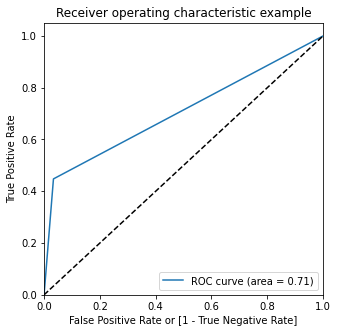

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred1, drop_intermediate = False )
draw_roc(y_test, y_pred1)